# Utilización de Support Vector Machines (SVM) para la Clasificación de personas con diabetes

<img alt="foto" height="100" src="https://i.postimg.cc/7H7zcX2c/CIMA-LOGO.png?dl=1" width="110"/>

En este notebook se presentan los códigos desarrollados para la implementación de un modelo de Support Vector Machine (SVM) con el objetivo de predecir la presencia de diabetes en individuos. Este trabajo ha sido realizado como parte de mis actividades del Círculo de Investigación de Máquinas de Aprendizaje (CIMA). 

#### Alumno:
 Arthur Jesus Abrahan Quispe Cuadros   

 [20211827@lamolina.du.pe]("mailto:20211827@lamolina.edu.pe.com")  

 [Linkedin](https://www.linkedin.com/in/arthurquispe/)  
 
 [GitHub](https://github.com/arthurquispe)

Esta data fue obtenida  de la web Kaggle, para acceder a los datos haz click [aqui](https://www.kaggle.com/code/mahmoudsaadmohamed/diabetes-analytics/input)

## Presentacion del caso 
Este conjunto de datos se proporciona en un formato tabular estructurado, almacenado en un archivo de valores separados por comas (CSV). Consiste en una colección de atributos relacionados con la salud que pueden utilizarse para la evaluación y predicción del riesgo de diabetes. Cada fila del conjunto de datos representa a un individuo y las columnas contienen varias medidas y características de salud. A continuación se muestra una descripción detallada de cada columna:

## Descripción de los datos

In [ ]:
# Id               : Identificador del individuo.
# Pregnancies      : Número de embarazos.  
# Glucose          : Nivel de concentración del plasma de glucosa.  
# BloodPressure    : Presión arterial diastólica (mmHg).  
# SkinThickness    : Grosor de pliegue cutáneo de tríceps (mm).
# Insulin          : Nivel de concentración de insulina (mu U/ml).
# BMI              : Body mass index (Índice de masa corporal).
# DiabetesPedigree : Puntuación de diabetes genetica
# Age              : Edad en años.
# Outcome          : Diabetes.

# La variable TARGET Outcome (Diabetes) está dada por 2 valores:
# 0 → Ausencia de diabetes.
# 1 → Presencia de diabetees

## Resultados

In [ ]:
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
#
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# ==============================================================================

In [ ]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'C:\Users\Arthur\Desktop\Python\MACHINE LEARNNING CON PYTHON\ML-UNALM\Healthcare-Diabetes.csv')
df.head(10)


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
fig = plt.figure(figsize = (10, 4))
outcome_corr = pd.DataFrame(df.corr()['Outcome'].sort_values(ascending = True))
plt.barh(outcome_corr.index, outcome_corr['Outcome'],color="#FF9912")
plt.title('Correlataion with Outcome')
plt.show()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [115]:
df["Outcome"] = df["Outcome"].astype('category') # Cambiamos la variable target a factor

In [116]:
df = df.drop('Id', axis=1) # Retiramos la columna id poque no aporta al modelo

In [117]:
df.isnull().any() # Visualizamos si hay datos faltantes

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [118]:
# Cambiamos el nombre de las columnas
df.columns = ["embarazos","glucosa","presion_sanguinea",
              "grosor_de_piel","insulina","imc","pedigri_diabetes","edad","diabetes"]

# Pregnacies                → embarazos
# Glucose                   → glucosa
# Blood Pressure            → presion_sanguinea
# SkinThickness             → grosor_de_piel    grosor de piel subcutaneo
# Insulin                   → insulina 
# BMI                       → imc 
# DiabetesPedigreeFunction  → pedigri_diabetes 
# Age                       → edad 
# Outcome                   → diabetes



<Axes: >

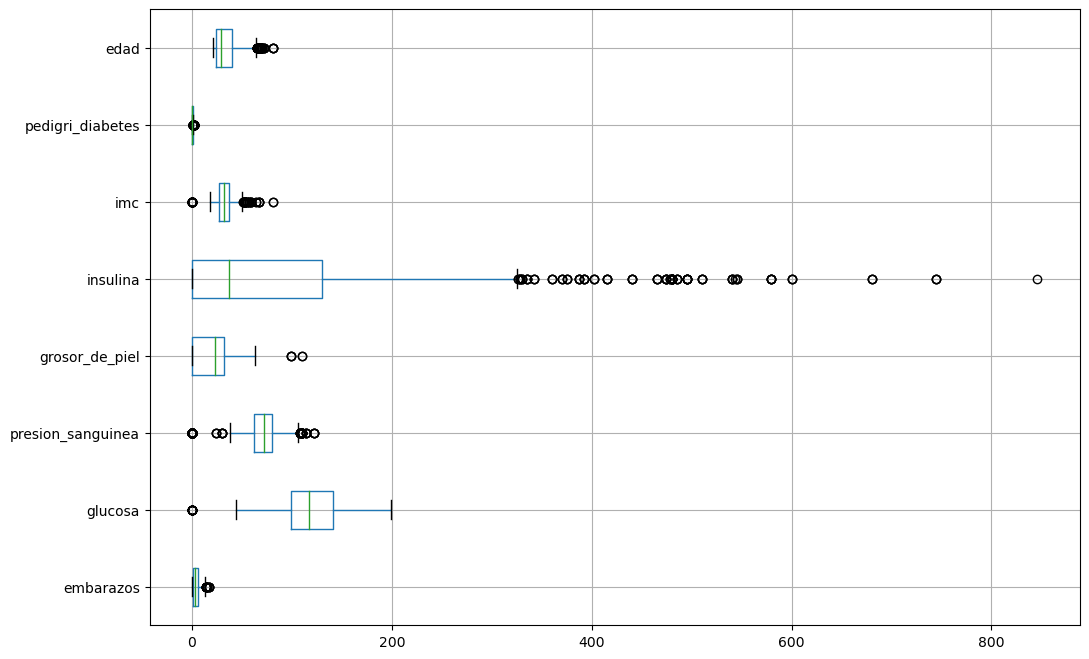

In [119]:
plt.figure(figsize=(12, 8))
df.boxplot(vert=False)

In [120]:
# Realizamos una tabla de conteo de elementos ceros en cada columna
zero_counts = (df == 0).sum()
zero_counts_df = pd.DataFrame({
    'Columna': zero_counts.index,
    'Cantidad de ceros': zero_counts.values
})


print(zero_counts_df)

             Columna  Cantidad de ceros
0          embarazos                412
1            glucosa                 18
2  presion_sanguinea                125
3     grosor_de_piel                800
4           insulina               1330
5                imc                 39
6   pedigri_diabetes                  0
7               edad                  0
8           diabetes               1816


In [107]:
# Filtramos aquellos datos que no tienen de valor cero, es inprobable que 
# una persona tenga cero glucosa en la sangre, al igual la
# presion sanguinea, grosor de piel, insulina, "imc"

df_filtered = df[(df["glucosa"] != 0)]
df_filtered = df_filtered[(df_filtered["presion_sanguinea"] != 0)]
df_filtered = df_filtered[(df_filtered["grosor_de_piel"] != 0)]
df_filtered = df_filtered[(df_filtered["insulina"] != 0)]
df_filtered = df_filtered[(df_filtered["imc"] != 0)]

df_filtered

,embarazos,glucosa,presion_sanguinea,grosor_de_piel,insulina,imc,pedigri_diabetes,edad,diabetes
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
2762,1,79,60,42,48,43.5,0.678,23,0
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2766,0,129,110,46,130,67.1,0.319,26,1


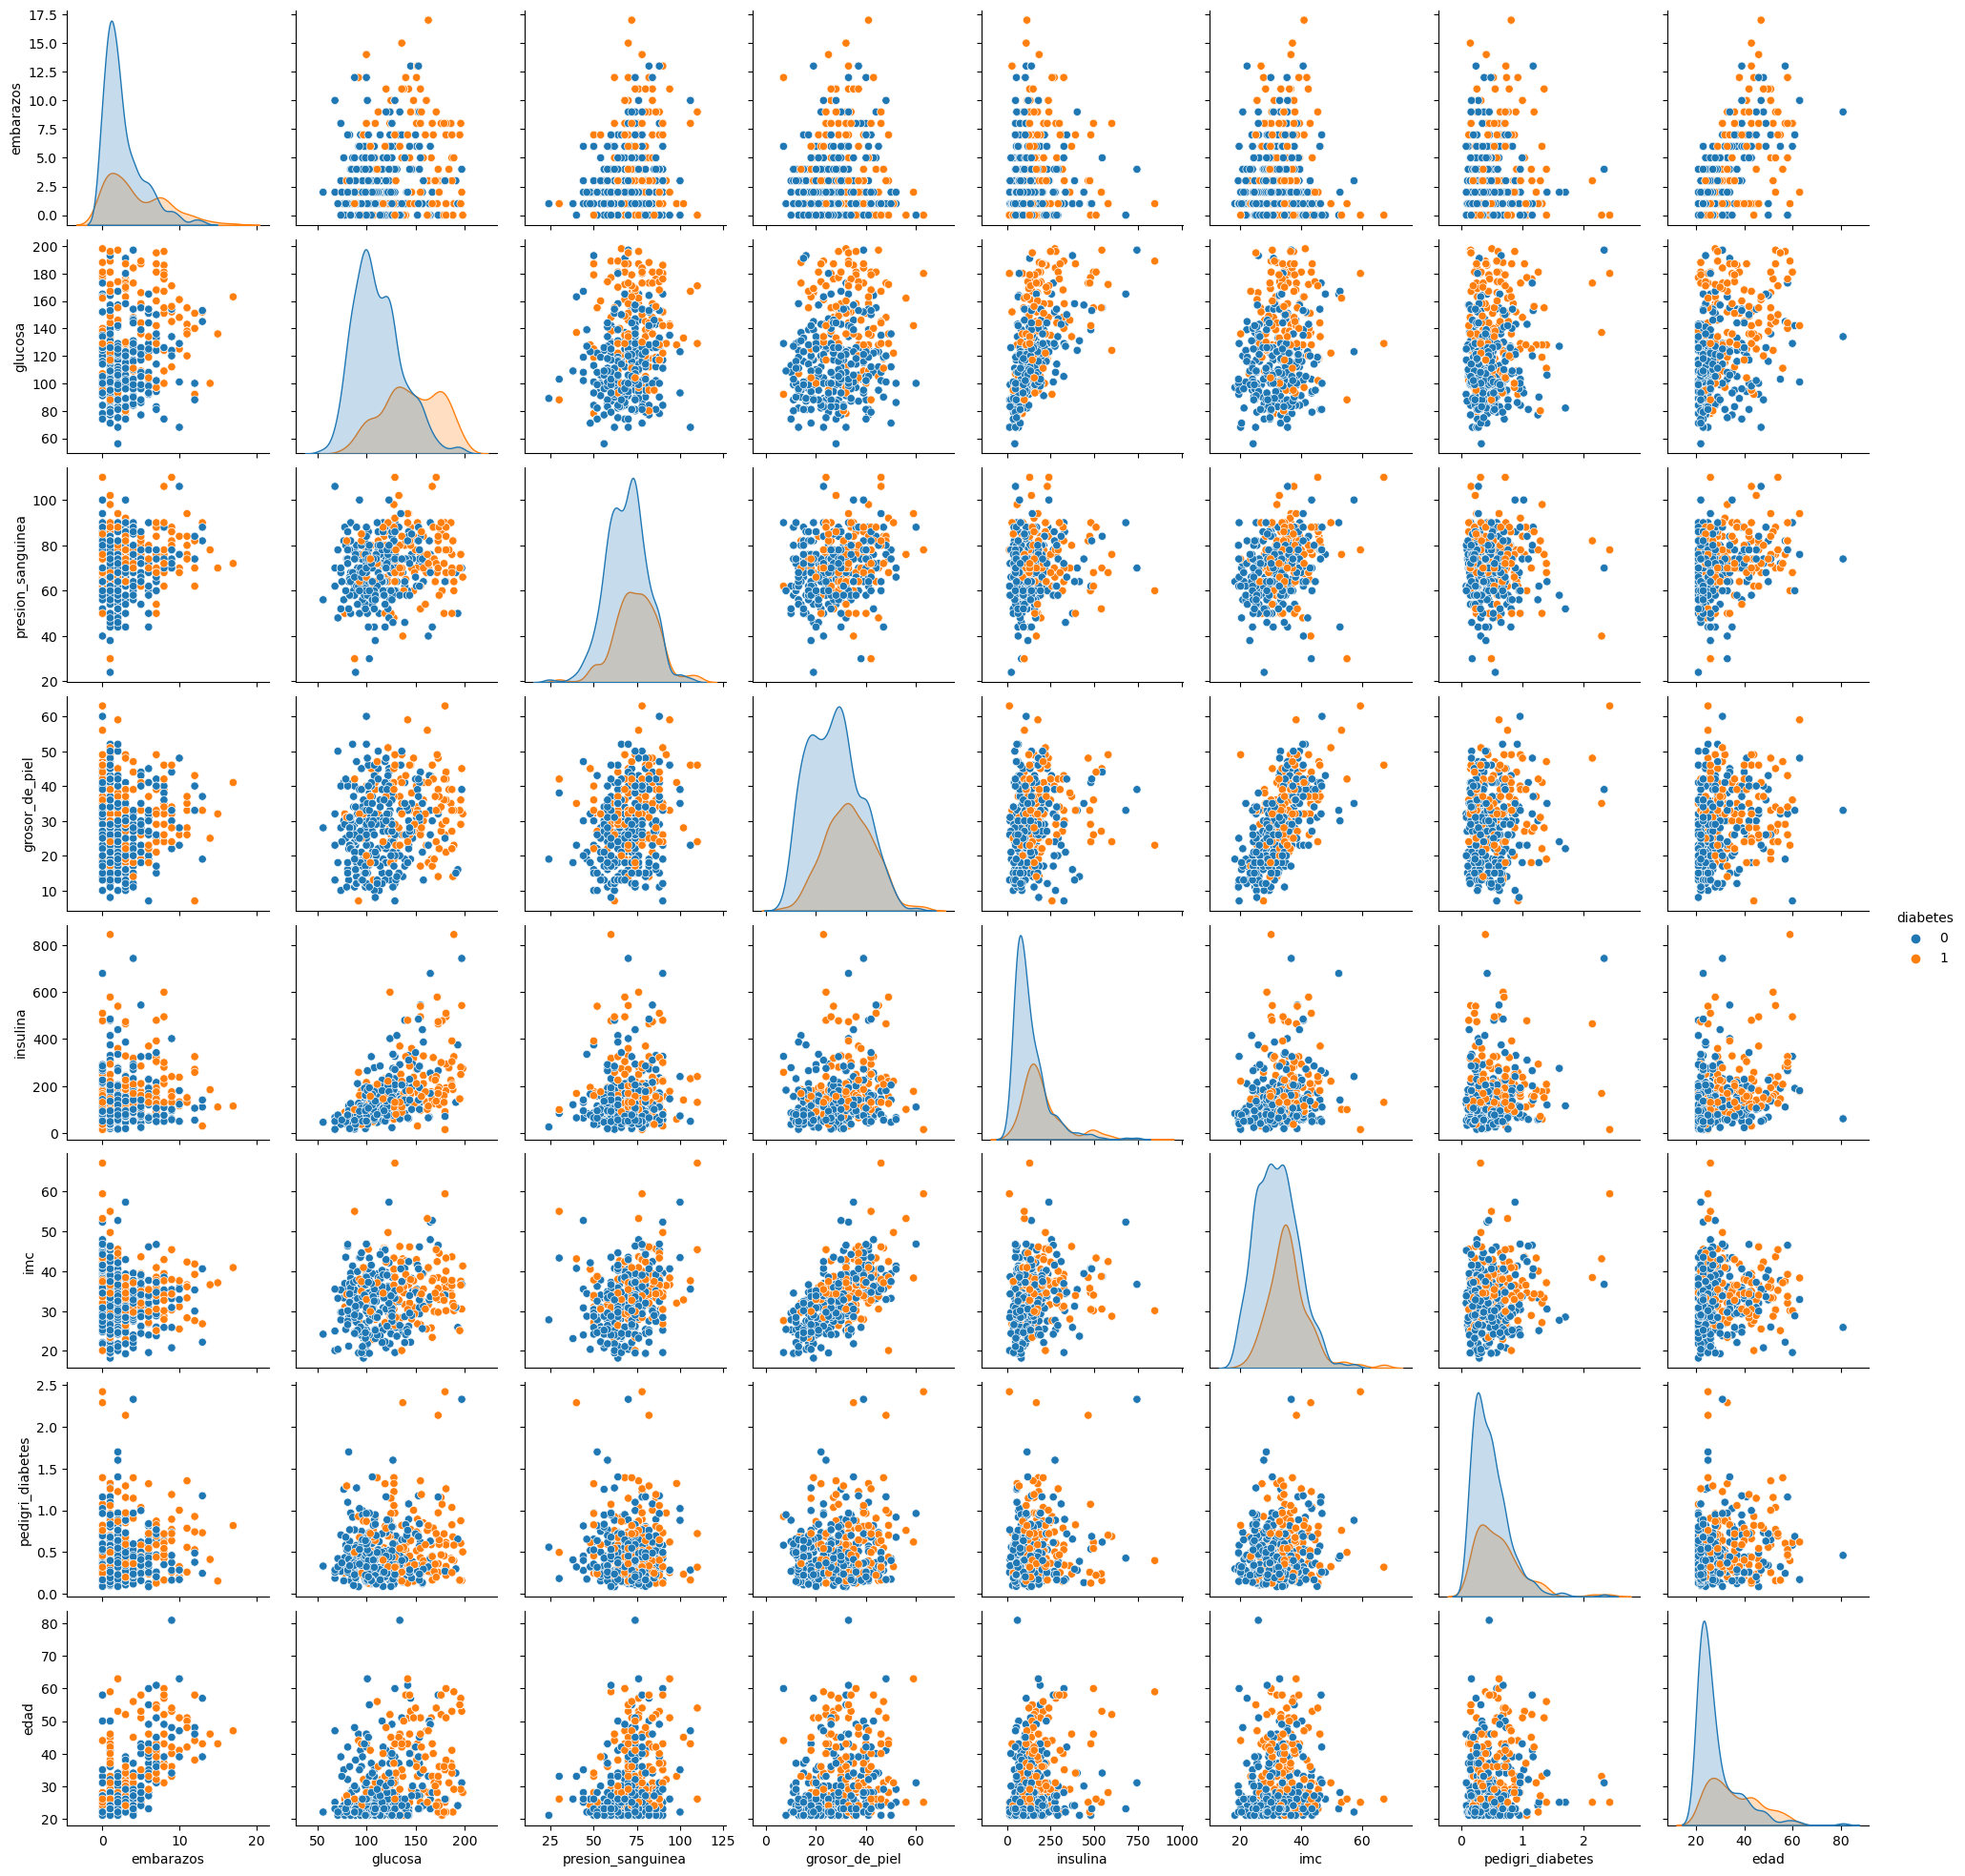

In [129]:
sns.pairplot(df_filtered,hue='diabetes')
plt.show()

In [136]:
df_filtered["diabetes"].value_counts()/len(df_filtered) # Proporcion manejable para realizar machine learnning 

0    0.67274
1    0.32726
Name: diabetes, dtype: float64

In [140]:
# División de los datos en train y test
df3 = df_filtered
# ==============================================================================
X = df3.drop(columns = 'diabetes')
y = df3['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train.shape # 1141 rows (0.8) 
X_test.shape  # 286  rows (0.2) 
X.shape       # 1427 rows 

(1427, 8)

In [147]:
# Realizamos el modelo SVM lineal 
from sklearn import svm
classifier = svm.SVC(kernel = "linear" , gamma = "auto", C=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       199
           1       0.66      0.61      0.63        87

    accuracy                           0.79       286
   macro avg       0.75      0.74      0.74       286
weighted avg       0.78      0.79      0.78       286



In [176]:
from sklearn.metrics import accuracy_score
print("Accuracy C = 2:")
print(classifier.score(X_test,y_test))


Accuracy C = 2:
0.7867132867132867


In [ ]:
### Tunear hiperparametros

In [170]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {
    'C': np.arange(start= 0.1 , stop = 3, step=0.5)
    }

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           cv = 4,
                           scoring = 'accuracy') 

grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
# En este caso salió C = 1.6

Mejores parámetros encontrados:
{'C': 1.6}


In [177]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba

print("Accuracy con C = 1.6 :")
print(best_model.score(X_test, y_test))

Accuracy con C = 1.6 :
0.7937062937062938


In [183]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

y_pred_svm       = classifier.predict(X_test)
y_pred_svm_tuned = grid_search.predict(X_test)

cm1 = confusion_matrix(y_test,y_pred_svm)
cm2 = confusion_matrix(y_test,y_pred_svm_tuned)
print("Matriz de confusion de svm c=2")
print(cm1)
print("Matriz de conusion de svm c=1.6 (Optimo)")
print(cm2)

Matriz de confusion de svm c=2
[[172  27]
 [ 34  53]]
Matriz de conusion de svm c=1.6 (Optimo)
[[174  25]
 [ 34  53]]


## Informacion de la versión

In [157]:
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.7.1
numpy       1.24.3
pandas      1.5.3
seaborn     0.12.2
sinfo       0.3.4
sklearn     1.2.2
-----
IPython             8.26.0
jupyter_client      8.6.2
jupyter_core        5.7.2
jupyterlab          4.2.4
notebook            7.2.1
-----
Python 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19045-SP0
4 logical CPU cores, AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
-----
Session information updated at 2024-09-01 14:53
